In [4]:
# PYTHON LIBRARIES
%matplotlib inline

import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=15)     
plt.rc('ytick', labelsize=15)

from scipy import special, optimize

########################################
def get_csv(filename):
    df = pd.read_csv(filename, delimiter=","); # Get CSV data
    units = df.iloc[0]; # Get units
    df = df.drop([0]); # Remove units row from dataframe
    
    #      [0]    [1]
    return units, df

### The Bird-Carreau-Yasuda Model [1]
### $$ \frac{\eta - \eta_{\infty}}{\eta_0 - \eta_{\infty}} = \frac{1}{\left[1 + \left(\kappa \dot{\gamma}\right)^a\right]^{\frac{(1 - n)}{a}}} $$
### $$ \eta = \frac{\eta_0 - \eta_{\infty}}{\left[1 + \left(\kappa \dot{\gamma}\right)^a\right]^{\frac{(1 - n)}{a}}} + \eta_{\infty} $$

### where:
$\eta =$ Viscosity <br>
$\dot{\gamma} =$ Shear rate <br>
$\eta_{\infty} =$ Infinite shear rate viscosity <br>
$\eta_0 =$ Zero shear rate viscosity <br>
$\kappa =$ Time constant <br>
$n =$ The Power Law index <br>
$a =$ The width of the transition region between the zero shear viscosity and the Power Law region

#### [1] Osswald, T., Rudolph, N., Osswald, T., & Rudolph, N. (2014). Generalized Newtonian Fluid (GNF) Models. Polymer Rheology, 59–99. https://doi.org/10.3139/9781569905234.003

In [5]:
def GNF_(gamma, eta_inft, eta_zero, kappa, n, a): # The Bird-Carreau-Yasuda Model Bird
    nume = eta_zero - eta_inft;
    
    base = 1 + (kappa*gamma)**a
    expo = (1 - n)/a
    deno = base**expo;
    
    return (nume/deno) + eta_inft

In [79]:
def fit_GNF_(filename, a):
    # Get units
    #units_df = get_csv("./csv/oskt 0_ps_thf.csv")[0]
    units_df = get_csv(filename)[0]

    # Get CSV data
    #nSeal_df = get_csv("./csv/oskt 0_ps_thf.csv")[1]
    nSeal_df = get_csv(filename)[1]

    # reasonable initial guesses for EOS parameters
    eta_inft = 0
    eta_zero = 1
    kappa    = 1
    n        = 0
    #a        = 9

    # # PRINT table with fittig parameters
    # tmplt_str_l = "  ".join(["{:<15}"] + ["{:<15}"]*5);
    # tmplt_str_s = "  ".join(["{:<15}"] + ["{:<15.7}"]*5);
    # print('')
    # print('Fitting:')
    # print(tmplt_str_l.format(*['parameters:', 'eta_inft', 'eta_zero', 'kappa', 'n', 'a']));
    # print("-" * 96);

    # Chose what to plot
    x_index = 1; # gamma = Shear rate
    y_index = 2; # eta   = Viscosity

    # Optimization process
    gamma = nSeal_df.iloc[:, x_index].to_numpy().astype(np.float);
    eta   = nSeal_df.iloc[:, y_index].to_numpy().astype(np.float);
    #eta_prev = GNF_(gamma, eta_inft, eta_zero, kappa, n, a);

    # remove neg values
    gamma = gamma[eta >= 0]
    eta = eta[eta >= 0]

    p0 = eta_inft, eta_zero, kappa, n, a;
    results = optimize.curve_fit(GNF_, gamma, eta, p0)

    eta_inft = results[0][0];
    eta_zero = results[0][1];
    kappa    = results[0][2];
    n        = results[0][3];
    a        = results[0][4];
    eta_fit = GNF_(gamma, eta_inft, eta_zero, kappa, n, a)

    # # PRINT table with fittig parameters
    # print(tmplt_str_s.format('Fit curve', *results[0], 0));

    # Draw plot canvas
    scale = 6;
    plt.subplots(figsize=(3*scale, 2*scale));

    # Plot
    plt.scatter(gamma, eta, s=25, color='red', label='Collected data');
    plt.plot(gamma, eta_fit, '-', linewidth=3, label='Fitted curve');

    # Print fitting parameters as plot legends
    x = gamma[0]
    y = eta[0]
    plt.scatter(x, y, s=0, label=' ')
    plt.scatter(x, y, s=0, label=r'$\eta_{\infty} = $' + str(round(eta_inft, 6)) + r' $Pa \cdot s$')
    plt.scatter(x, y, s=0, label=r'$\eta_0 = $' + str(round(eta_zero, 6)) + r' $Pa \cdot s$')
    plt.scatter(x, y, s=0, label=r'$\kappa = $' + str(round(kappa, 6)))
    plt.scatter(x, y, s=0, label=r'$n = $' + str(round(n, 6)))
    plt.scatter(x, y, s=0, label=r'$a = $' + str(round(a, 6)))

    # Display plots
    plt.yscale('log');
    plt.xscale('log');
    plt.xlabel(str(nSeal_df.columns[x_index]) + " [" + str(units_df[x_index]) + "]", fontsize=24);
    plt.ylabel(str(nSeal_df.columns[y_index]) + " [" + str(units_df[y_index]) + "]", fontsize=24);
    plt.title('Bird-Carreau-Yasuda Model Fit', size=24);
    plt.legend(prop={'size': 18});
    display(plt);

---

C:\Users\oskat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.


<module 'matplotlib.pyplot' from 'C:\\Users\\oskat\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

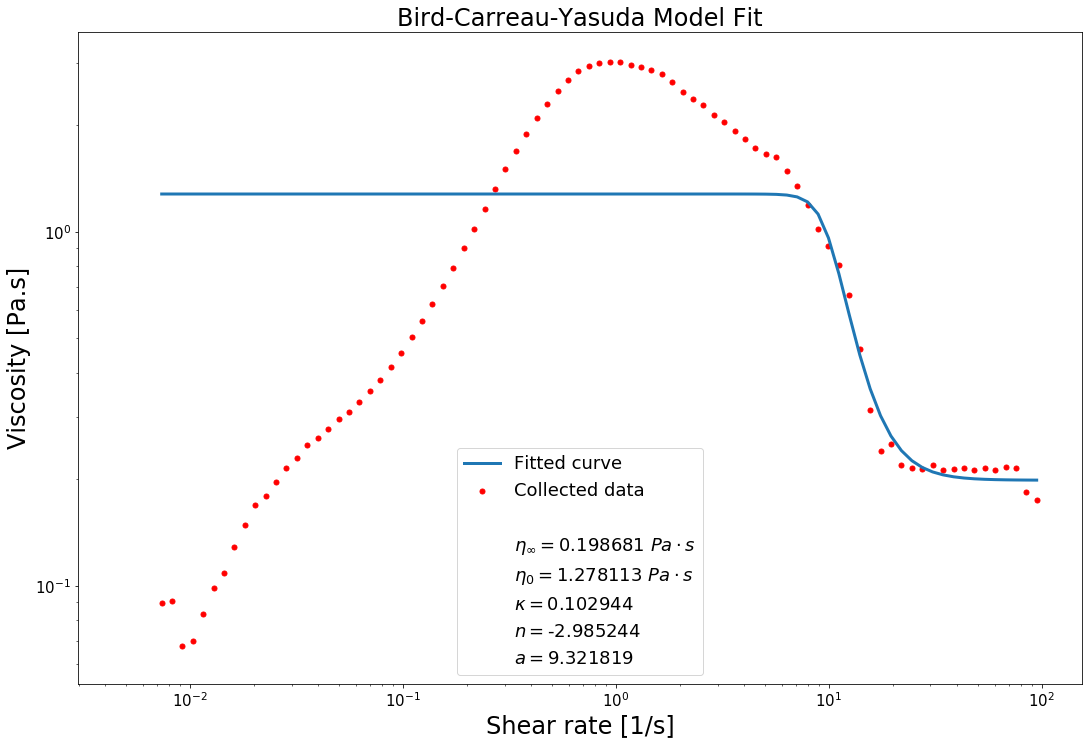

In [102]:
#fit_GNF_("./csv/oskt 0_ps_thf.csv", 9)
#fit_GNF_("./csv/oskt 1_ps_thf.csv", 2)
#fit_GNF_("./csv/oskt 2_ps_thf.csv", 700)
#fit_GNF_("./csv/oskt 3_ps_thf.csv", 1)
fit_GNF_("./csv/oskt 4_ps_thf.csv", 1)

Stress            MPa
Shear rate        1/s
Viscosity        Pa.s
Step time           s
Temperature        °C
Normal stress     MPa
Name: 0, dtype: object

<module 'matplotlib.pyplot' from 'C:\\Users\\oskat\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

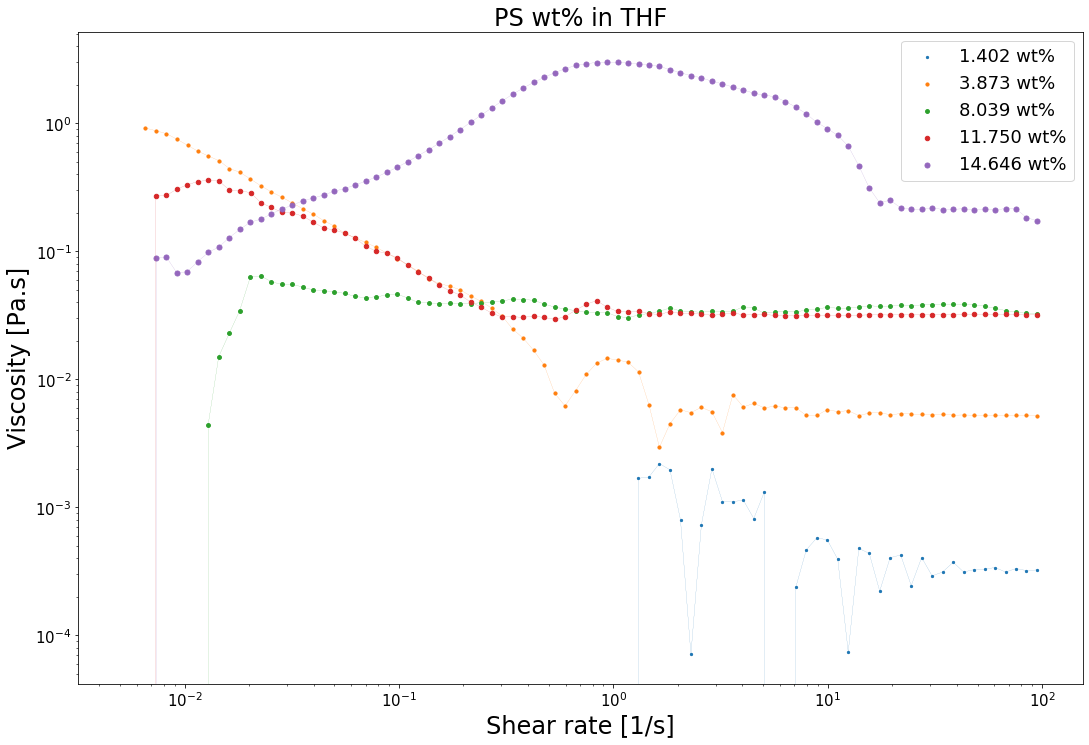

In [68]:
# Get units
units_df = get_csv("./csv/oskt 0_ps_thf.csv")[0]
display(units_df)

# Get CSV data
_0_ps_thf_df = get_csv("./csv/oskt 0_ps_thf.csv")[1]
_1_ps_thf_df = get_csv("./csv/oskt 1_ps_thf.csv")[1]
_2_ps_thf_df = get_csv("./csv/oskt 2_ps_thf.csv")[1]
_3_ps_thf_df = get_csv("./csv/oskt 3_ps_thf.csv")[1]
_4_ps_thf_df = get_csv("./csv/oskt 4_ps_thf.csv")[1]

# Draw plot canvas
scale = 6;
plt.subplots(figsize=(3*scale, 2*scale));

# Chose what to plot
x_index = 1
y_index = 2

# Plot
x = _0_ps_thf_df.iloc[:, x_index].to_numpy().astype(np.float)
y = _0_ps_thf_df.iloc[:, y_index].to_numpy().astype(np.float)
plt.scatter(x, y, s=5, label='1.402 wt%');
plt.plot(x, y, linewidth=0.125);

x = _1_ps_thf_df.iloc[:, x_index].to_numpy().astype(np.float)
y = _1_ps_thf_df.iloc[:, y_index].to_numpy().astype(np.float)
plt.scatter(x, y, s=10, label='3.873 wt%');
plt.plot(x, y, linewidth=0.125);

x = _2_ps_thf_df.iloc[:, x_index].to_numpy().astype(np.float)
y = _2_ps_thf_df.iloc[:, y_index].to_numpy().astype(np.float)
plt.scatter(x, y, s=15, label='8.039 wt%');
plt.plot(x, y, linewidth=0.125);

x = _3_ps_thf_df.iloc[:, x_index].to_numpy().astype(np.float)
y = _3_ps_thf_df.iloc[:, y_index].to_numpy().astype(np.float)
plt.scatter(x, y, s=20, label='11.750 wt%');
plt.plot(x, y, linewidth=0.125);

x = _4_ps_thf_df.iloc[:, x_index].to_numpy().astype(np.float)
y = _4_ps_thf_df.iloc[:, y_index].to_numpy().astype(np.float)
plt.scatter(x, y, s=25, label='14.646 wt%');
plt.plot(x, y, linewidth=0.125);

# Display plots
plt.yscale('log');
plt.xscale('log');
plt.xlabel(str(nSeal_df.columns[x_index]) + " [" + str(units_df[x_index]) + "]", fontsize=24);
plt.ylabel(str(nSeal_df.columns[y_index]) + " [" + str(units_df[y_index]) + "]", fontsize=24);
plt.title('PS wt% in THF', size=24);
plt.legend(prop={'size': 18});
display(plt);

---

C:\Users\oskat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.
C:\Users\oskat\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in power
  


<module 'matplotlib.pyplot' from 'C:\\Users\\oskat\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

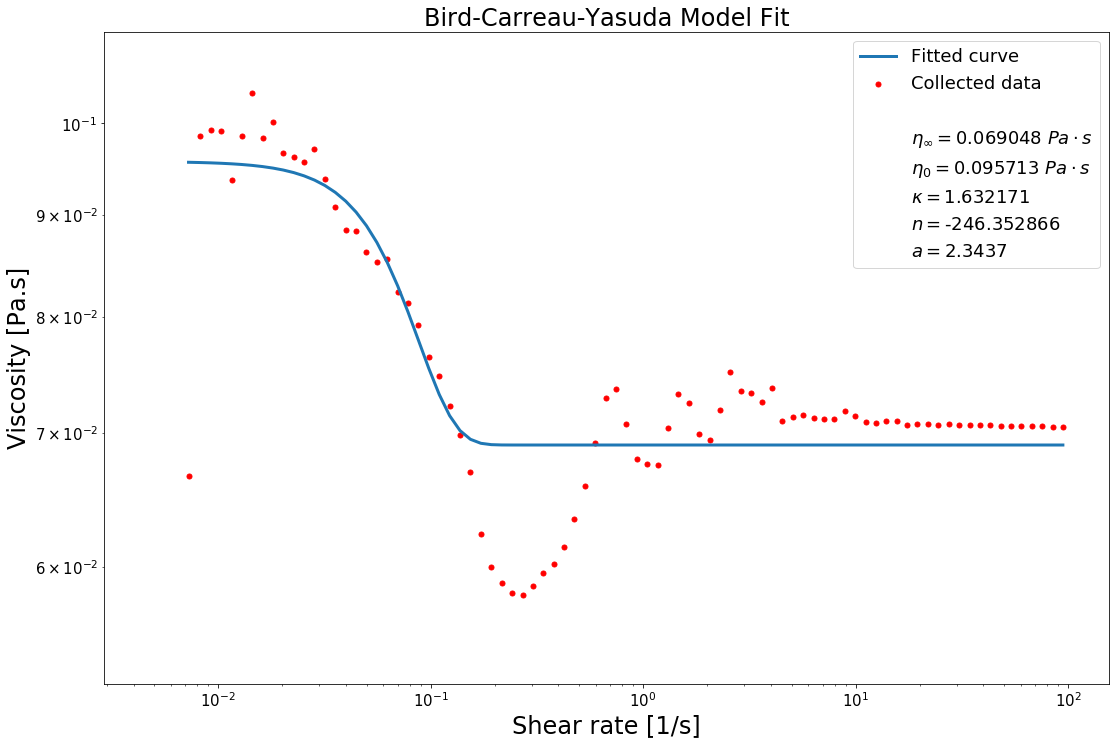

In [137]:
#fit_GNF_("./csv/oskt 5_psb_thfdmf.csv", 800)
#fit_GNF_("./csv/oskt 6_psb_thfdmf.csv", 1)
#fit_GNF_("./csv/oskt 7_psb_thfdmf.csv", 400)
#fit_GNF_("./csv/oskt 8_psb_thfdmf.csv", 500)
fit_GNF_("./csv/oskt 9_psb_thfdmf.csv", 1)

Stress            MPa
Shear rate        1/s
Viscosity        Pa.s
Step time           s
Temperature        °C
Normal stress     MPa
Name: 0, dtype: object

<module 'matplotlib.pyplot' from 'C:\\Users\\oskat\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

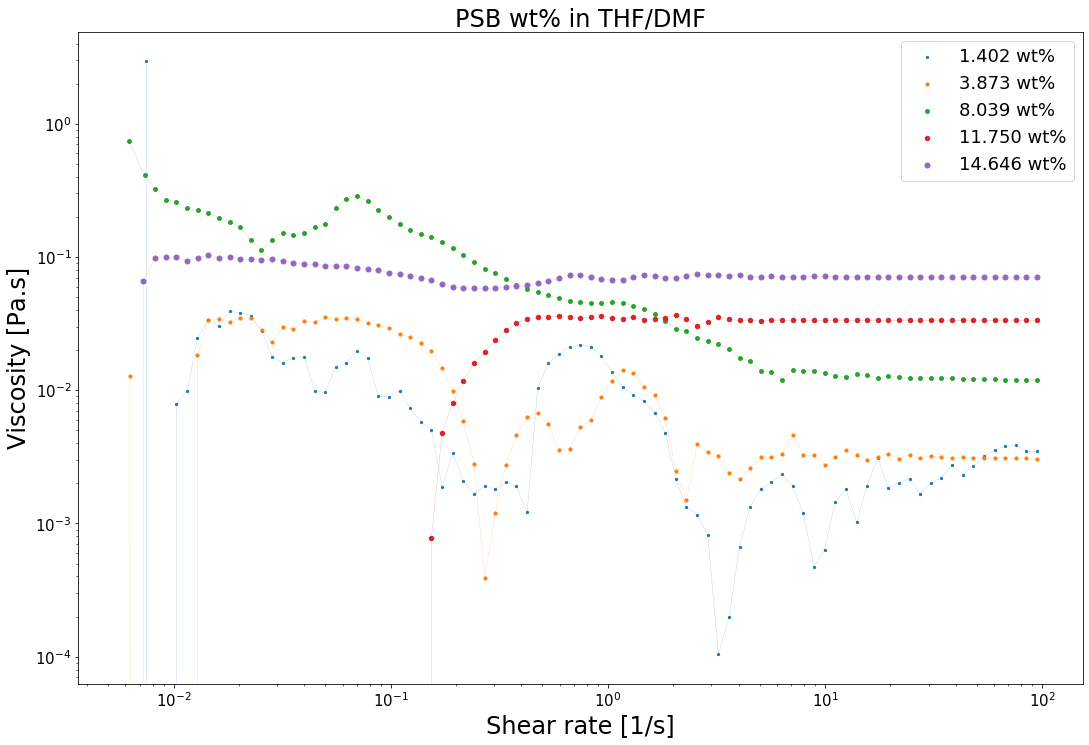

In [26]:
# Get units
units_df = get_csv("./csv/oskt 0_ps_thf.csv")[0]
display(units_df)

# Get CSV data
_5_psb_thfdmf = get_csv("./csv/oskt 5_psb_thfdmf.csv")[1]
_6_psb_thfdmf = get_csv("./csv/oskt 6_psb_thfdmf.csv")[1]
_7_psb_thfdmf = get_csv("./csv/oskt 7_psb_thfdmf.csv")[1]
_8_psb_thfdmf = get_csv("./csv/oskt 8_psb_thfdmf.csv")[1]
_9_psb_thfdmf = get_csv("./csv/oskt 9_psb_thfdmf.csv")[1]

# Draw plot canvas
scale = 6;
plt.subplots(figsize=(3*scale, 2*scale));

# Chose what to plot
x_index = 1
y_index = 2

# Plot
x = _5_psb_thfdmf.iloc[:, x_index].to_numpy().astype(np.float)
y = _5_psb_thfdmf.iloc[:, y_index].to_numpy().astype(np.float)
plt.scatter(x, y, s=5, label='1.402 wt%');
plt.plot(x, y, linewidth=0.125);

x = _6_psb_thfdmf.iloc[:, x_index].to_numpy().astype(np.float)
y = _6_psb_thfdmf.iloc[:, y_index].to_numpy().astype(np.float)
plt.scatter(x, y, s=10, label='3.873 wt%');
plt.plot(x, y, linewidth=0.125);

x = _7_psb_thfdmf.iloc[:, x_index].to_numpy().astype(np.float)
y = _7_psb_thfdmf.iloc[:, y_index].to_numpy().astype(np.float)
plt.scatter(x, y, s=15, label='8.039 wt%');
plt.plot(x, y, linewidth=0.125);

x = _8_psb_thfdmf.iloc[:, x_index].to_numpy().astype(np.float)
y = _8_psb_thfdmf.iloc[:, y_index].to_numpy().astype(np.float)
plt.scatter(x, y, s=20, label='11.750 wt%');
plt.plot(x, y, linewidth=0.125);

x = _9_psb_thfdmf.iloc[:, x_index].to_numpy().astype(np.float)
y = _9_psb_thfdmf.iloc[:, y_index].to_numpy().astype(np.float)
plt.scatter(x, y, s=25, label='14.646 wt%');
plt.plot(x, y, linewidth=0.125);

# Display plots
plt.yscale('log');
plt.xscale('log');
plt.xlabel(str(nSeal_df.columns[x_index]) + " [" + str(units_df[x_index]) + "]", fontsize=24);
plt.ylabel(str(nSeal_df.columns[y_index]) + " [" + str(units_df[y_index]) + "]", fontsize=24);
plt.title('PSB wt% in THF/DMF', size=24);
plt.legend(prop={'size': 18});
display(plt);